# Examples of Getting Limits in Frequentist and Bayesian
By Yi-Lun (Alan) Chung$^\dagger$ , Carter Vu$^*$, Haoran Zhao$^*$, Qibin Liu$^\diamond$ and Hui-Chi Lin$^\dagger$ 

$^\dagger$ National Tsing Hua University, Taiwan

$^*$ University of Washington, Seattle

$^\diamond$ Shanghai Jiao Tong University

Spring 2021

Ref: https://arxiv.org/pdf/1307.2487.pdf

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm

import numpy as np
import sys, os
import importlib
import time

import scipy.integrate as integrate

# # Part 1: p-Values calculation and Significance 


## p-Values
The probability p that the considered test statistic t assumes a value `greater or
equal to the observed one.` Here, we can take normal distribution function to be a very simple test statistic t.

## $$ t = g(x|\mu=0,\sigma=1) = \frac{1}{\sqrt{2\pi\,\sigma^2}}exp[-\frac{(x-\mu)^2}{2\,\sigma^2}]$$
## $$ \text{p-value} = P(x \geq N) $$ 

where N is a given number

In particle physics, we often use another relevent quantity to describe how important the signal is: `Significance Level`. The relation between significance and p-value is 

## $$ \text{p-value} = \int_{Z}^{\infty} \,g(x|\mu=0,\sigma=1)\,dx $$

By convention, in literature, one claims the `evidence` of the signal under
investigation if the significance is at least 3$\sigma$ (Z = 3), which corresponds to a
probability of background fluctuation of 1.35$\times 10^{-3}$. One claims the `observation`
of a signal (discovery) in case the significance is at least 5$\sigma$ (Z = 5), corresponding
to a p-value of 2.87$\times 10^{-7}$.  (from: Statistical Methods for Data
Analysis in Particle Physic, Ch:10.2.2)






# Example1: 
We will calculation p-values and significance and take Gaussain for example.

Pleas check that wherter p-values and significance table is correct or not.

In [19]:
## define a gaussian function
#####################################################################

def Gaussian(x,mu,sigma):
    gaussian = 1./np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    return gaussian


In [262]:
## We use integrate.quad the function to intergrate a function.
## integrate.quad(function(x,a,b,c,d,.....), x1, x2 , args=(a,b,c,d,......))
#####################################################################

mu,sigma = 0, 1
result = integrate.quad(Gaussian, -np.inf, np.inf , args=(mu,sigma))

print("Gaussian integral from negative inf. to postive inf. is : {:^2.2f}".format(result[0]))

Gaussian integral from negative inf. to postive inf. is : 1.00


In [263]:
## Print significance v.s p-value table
#####################################################################

mu,sigma = 0, 1

significance =  [1,1.28,1.64,2,2.32,3,3.09,3.71,4,5,6]
p_value = []

print("{:^5} {:^10}".format("Z(p)", "p-Value"))
for z in significance:
    result = integrate.quad(Gaussian, z, np.inf , args=(mu,sigma))
    p_value.append(result[0])
    
    print("{:^5.2f} {:^10.2E}".format(z,result[0]))

Z(p)   p-Value  
1.00   1.59E-01 
1.28   1.00E-01 
1.64   5.05E-02 
2.00   2.28E-02 
2.32   1.02E-02 
3.00   1.35E-03 
3.09   1.00E-03 
3.71   1.04E-04 
4.00   3.17E-05 
5.00   2.87E-07 
6.00   9.87E-10 


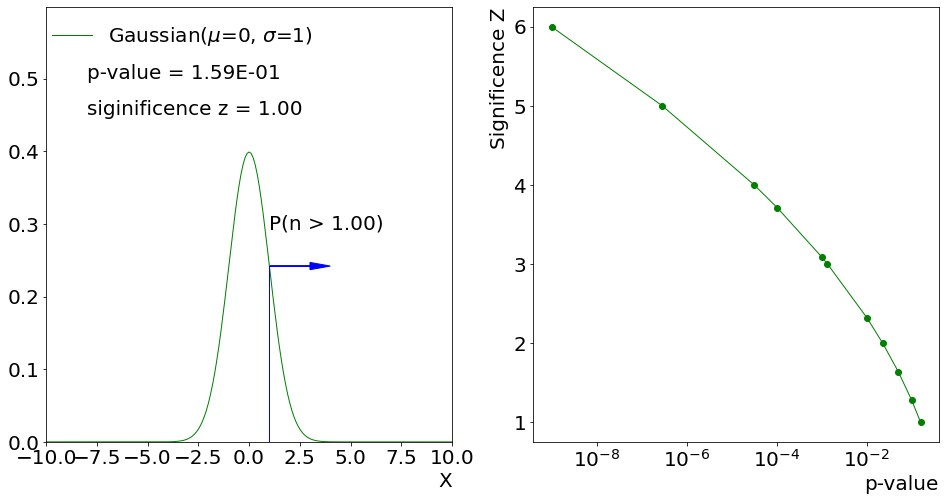

In [257]:
## Make two figures. 
## One is a normal distribution. The other is significance v.s p-value.
#######################################################################


z = 1
result = integrate.quad(Gaussian, z, np.inf , args=(mu,sigma))


fig, ax = plt.subplots(1,1, figsize=(16,8)) # plotsize
bin_size = np.linspace(-40,40,801)

plt.subplot(1,2,1)

plt.plot(bin_size, Gaussian(bin_size,0,1), color = "green", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=0, $\sigma$=1)")


plt.axvline(x=z , ymin=0, ymax = Gaussian(z,0,1)/(max(Gaussian(bin_size,0,1))*1.5), linewidth = 1, linestyle = "-", color = "Blue")
plt.arrow(z,Gaussian(z,0,1), 2,0, head_length=1, head_width=0.01 ,color = "Blue" )
# ax.axhline(y=Gaussian(2,0,1) , xmin=0, xmax = 12/20, linewidth = 1, linestyle = "-", color = "Blue")
plt.text(z, Gaussian(z,0,1)+0.05 , "P(n > %.2f)"%z, fontsize=20)

plt.text(-8, 0.5 , "p-value = %.2E"%result[0], fontsize=20)
plt.text(-8, 0.45 , "siginificence z = %.2f"%z, fontsize=20)


# plt.legend(loc="best",ncol=1,fontsize=20,frameon=False)# plot label tag
plt.legend(bbox_to_anchor=(0.7, 0, 0, 1),ncol=1,fontsize=20,frameon=False)# plot label tag
# plt.yscale('log') 
# plt.xscale('log') 
plt.xlabel("X" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
# plt.ylabel("# of data points [N/10]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=20)   # set x-ticks size
plt.yticks(fontsize=20)   # set y-ticks size 
plt.xlim((-10,10))
plt.ylim((0,max(Gaussian(bin_size,0,1))*1.5))
# plt.savefig("./gaussian_0_1.pdf")  #save figure as pdf


plt.subplot(1,2,2)

from scipy.stats import norm
## "norm.ppf" is a inverse cumulative funcion for normal distribution

plt.plot(p_value, norm.ppf(1-np.array(p_value)), color = "green", linestyle="-",linewidth=1, alpha=1)
# plt.plot(p_value, significance, color = "green", linestyle="-",linewidth=1, alpha=1)
plt.scatter(p_value, significance, color = "green", linestyle="-",linewidth=1, alpha=1)

plt.xlabel("p-value" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("Significence Z", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xscale('log') 
plt.xticks(fontsize=20)   # set x-ticks size
plt.yticks(fontsize=20)   # set y-ticks size 
# plt.legend(loc="best",ncol=1,fontsize=20,frameon=False)# plot label tag
# plt.legend(bbox_to_anchor=(0.7, 0, 0, 1),ncol=1,fontsize=20,frameon=False)# plot label tag


plt.show()

# Excerise 1: 
Please use this Poisson distribution to be a test statistic t. 

# Poisson Distribution

Probability mass function: 

## $$p(n|s+b) = exp[-(s+b)]\frac{(s+b)^n}{n!}\text{ for }n\geq0$$


Note that the PMF is the discrete counterpart of the continuous PDF! See this link for more details: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html


#### And let (s+b)=10



## $$p[n|(s+b)=10] = exp[-(10)]\times\frac{(10)^n}{n!}\text{ for }n\geq0$$

#### 1. Creat a significance v.s p-value table
#####    significance = [1,2,3,4,5,6,7,8,9,10,11,12]
#### 2. Make two figures. 
#### One is a Poisson distribution. The other is significance v.s p-value. (like above)


In [241]:
from scipy.stats import poisson
def Poisson(n,s,b):
    poisson = np.exp(-(s+b))*(s+b)**n/np.math.factorial(n)
    return poisson

In [264]:
#### a. Creat a significance v.s p-value table
#####    significance = [1,2,3,4,5,6,7,8,9,10,11,12]
#######################################################################









In [265]:
#### b. Make two figures. 
#### One is a Poisson distribution. The other is significance v.s p-value. (like above)
#######################################################################










In [270]:
#### c.please descirbe what is different between Gaussian case and Poisson case.
#######################################################################

# A:


# Part 2: Limits

## Assume signal is 0, when we have $n_{obs}$ observed events.
## What is the upper limit for signal ($s_{up}$) at 95% CL ?

Please read  `Statistical Methods for Data Analysis in Particle Physic, Ch:10.5` or https://arxiv.org/pdf/1307.2487.pdf to find the definitions of upper limit.

Also, you may find there are two approach: Frequentist and Bayesian.

In this excerise, we will use Poission distribution to show the difference between these two approach.

# Example 2-a : Frequentist approach

Here, we assume we observe `5 events`. We follow the defination of Frequentist approach to calculate the upper limit for number of signal event ($s_{up}$) with each expected number of background (b) at 95% CL.
This example is from scratch. You may find some packages for help, e.g. pyhf, scipy,...

In [282]:
#### a-1. The key point is sum over Poission from n=0 to n=n_obs=5 at a given b.
#### Then find which s let sum over Poission be close to 95% CL criteria.
#######################################################################

import time
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
############################################################################################################################################################

CL = 0.95
s = np.linspace(0,20,200)
n_obs = 5
b_bkg = np.linspace(0,20,200)

s_up = []

for b in b_bkg:
    tmp = []
    for element in s:
        sumover = 0
        for n in range(n_obs+1):
            sumover += Poisson(n,element,b)  # sum over Poission from n=0 to n=n_obs=5 

        tmp.append(abs(sumover-(1-CL)))
        
    min_position = np.where(tmp == np.min(tmp))  # find which s let sum over Poission be close to 95% CL criteria.
    s_up.append(s[min_position])
    
s_up = np.array(s_up) 


############################################################################################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime Cost : {:.4f} min \033[0;m".format(totaltime/60.))

Sun Feb 28 16:21:43 2021
Time Cost : 0.0189 min 


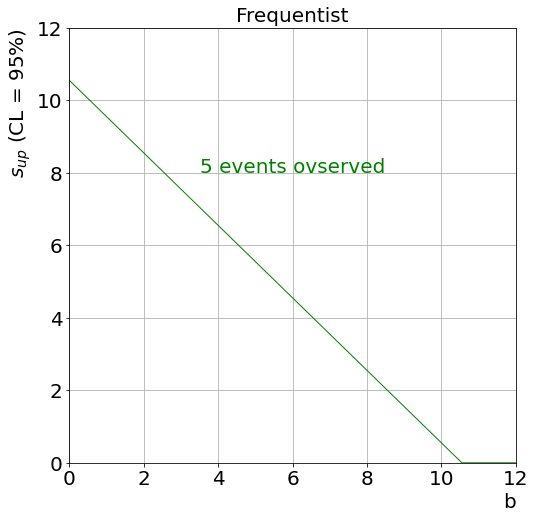

In [278]:
#### a-2. The s_up v.s b at n_obs=5
#######################################################################

fig, ax = plt.subplots(1,1, figsize=(8,8)) # plotsize

plt.plot(b_bkg,s_up, color = "green", linestyle="-",linewidth=1, alpha=1)

plt.text(3.5, 8 , "5 events ovserved", color = "green", fontsize=20)

plt.title("Frequentist", fontsize=20)
plt.grid()
plt.xlabel("b" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("$s_{up}$ (CL = 95%)", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
# plt.xscale('log') 
plt.xticks(fontsize=20)   # set x-ticks size
plt.yticks(fontsize=20)   # set y-ticks size 
plt.xlim((0,12))
plt.ylim((0,12))
# plt.legend(loc="best",ncol=1,fontsize=20,frameon=False)# plot label tag
# plt.legend(bbox_to_anchor=(0.7, 0, 0, 1),ncol=1,fontsize=20,frameon=False)# plot label tag


plt.show()

# Example 2-b : Bayesian approach (with flat prior for s)

## $$p(s|n) = exp[-(s+b)]\times\frac{(s+b)^n}{\Gamma(b,n+1)}$$
## $$\Gamma(b,n+1)=\int_b^{\infty}x^n\exp^{-x}dx$$



Here, we assume we observe `5 events`. We follow the defination of Bayesian approach to calculate the upper limit for number of signal event ($s_{up}$) with each expected number of background (b) at 95% CL.
This example is from scratch. You may find some packages for help, e.g. pyhf, scipy,...

In [281]:
def Gamma_fn(b,n):
    def integrate_object(x, n):
        return x**n*np.exp(-x)
    
    result = integrate.quad(integrate_object, b, np.inf , args=(n-1))
    
    return result[0]


def New_Poisson(s,n,b):
    poisson = np.exp(-(s+b))*(s+b)**n/Gamma_fn(b,n+1)
    return poisson


In [283]:
#### b-1. The key point is integrate Poission from s=0 to s=s_up at given b and n_obs.
#### Then find which s_up let integral be close to 95% CL criteria.
#######################################################################


print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
############

CL = 0.95
s = np.linspace(0,20,200)
n_obs = 5
b_bkg = np.linspace(0,20,200)

s_up = []

for b in b_bkg:
    tmp = []
    for element in s:
        integral = integrate.quad(New_Poisson, 0, element , args=(n_obs,b))[0]
        
        tmp.append(abs(integral-CL))
        
    min_po = np.where(tmp == np.min(tmp))    
    s_up.append(s[min_po])
    
s_up = np.array(s_up) 



############################################################################################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime Cost : {:.4f} min \033[0;m".format(totaltime/60.))

Sun Feb 28 16:22:12 2021
Time Cost : 4.6996 min 


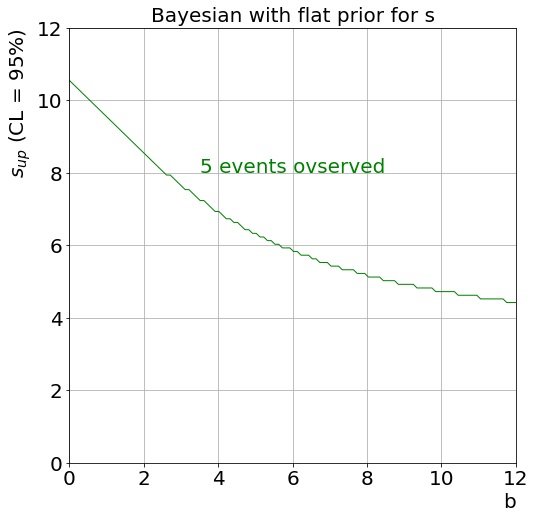

In [284]:
#### b-2. The s_up v.s b at n_obs=5
#######################################################################


fig, ax = plt.subplots(1,1, figsize=(8,8)) # plotsize

plt.plot(b_bkg,s_up, color = "green", linestyle="-",linewidth=1, alpha=1)

plt.text(3.5, 8 , "5 events ovserved", color = "green", fontsize=20)

plt.title("Bayesian with flat prior for s", fontsize=20)
plt.grid()
plt.xlabel("b" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("$s_{up}$ (CL = 95%)", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
# plt.xscale('log') 
plt.xticks(fontsize=20)   # set x-ticks size
plt.yticks(fontsize=20)   # set y-ticks size 
plt.xlim((0,12))
plt.ylim((0,12))
# plt.legend(loc="best",ncol=1,fontsize=20,frameon=False)# plot label tag
# plt.legend(bbox_to_anchor=(0.7, 0, 0, 1),ncol=1,fontsize=20,frameon=False)# plot label tag


plt.show()

# Excerise 2: 

In [ ]:
#### a. Please describe the definitions of upper limit.
#######################################################################







In [271]:
#### b. What is the Frequentist approach for upper limit?
#######################################################################



In [272]:
#### c. What is the Bayesian approach for upper limit?
#######################################################################



In [ ]:
#### d.  Show the plot for s_up v.s b at n_obs=[0,1,2,3,4,5,6] in Frequentist approach
#######################################################################





In [285]:
#### e.  Show the plot for s_up v.s b at n_obs=[0,1,2,3,4,5,6] in Bayesian approach
#######################################################################






In [286]:
#### f. Please describe the difference between result d and result e.
#######################################################################




